In [55]:
import cv2
import os
from matplotlib import pyplot as plt
import random
import pdb
import numpy as np
from scipy import ndimage
from six.moves import cPickle as pickle

 Helpful sources: http://mlwak.blogspot.com/2016/06/udacity-assignment-1-not-mnist.html

### 1: load data and show some images

In [56]:
# Returns data in format { 'folders': {}, 'image_paths': [] }
def load_image_paths_from_folder(folder):
    print("Getting image paths from {}".format(folder))
    result = { 'folders': {}, 'image_paths': [] }
    for name in os.listdir(folder):
        is_folder = os.path.isdir(os.path.join(folder, name))
        if is_folder:
            subfolder = os.path.join(folder, name)
            result['folders'][subfolder] = load_image_paths_from_folder(subfolder)
        else:
            image_path = os.path.join(folder, name)
            result['image_paths'].append(image_path)
    return result


In [57]:
def plot_samples(image_paths, sample_size, name):
    figure = plt.figure()
    figure.suptitle(name)
    folders = image_paths['folders']
    for folder_name, folder in folders.items():
        image_path_samples = random.sample(folder['image_paths'], sample_size)
        for image_path in image_path_samples:
            subplot = figure.add_subplot(
                sample_size,
                len(folders),
                list(folders).index(folder_name) * sample_size + image_path_samples.index(image_path) + 1
            )
            image = cv2.imread(os.path.join(image_path))
            subplot.imshow(image)
            subplot.set_axis_off()
    plt.show()

Getting image paths from ../notMNIST_large
Getting image paths from ../notMNIST_large/B
Getting image paths from ../notMNIST_large/F
Getting image paths from ../notMNIST_large/J
Getting image paths from ../notMNIST_large/G
Getting image paths from ../notMNIST_large/C
Getting image paths from ../notMNIST_large/E
Getting image paths from ../notMNIST_large/D
Getting image paths from ../notMNIST_large/H
Getting image paths from ../notMNIST_large/A
Getting image paths from ../notMNIST_large/I
Getting image paths from ../notMNIST_small
Getting image paths from ../notMNIST_small/B
Getting image paths from ../notMNIST_small/F
Getting image paths from ../notMNIST_small/J
Getting image paths from ../notMNIST_small/G
Getting image paths from ../notMNIST_small/C
Getting image paths from ../notMNIST_small/E
Getting image paths from ../notMNIST_small/D
Getting image paths from ../notMNIST_small/H
Getting image paths from ../notMNIST_small/A
Getting image paths from ../notMNIST_small/I


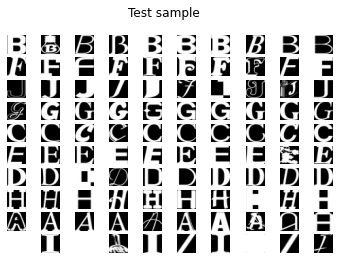

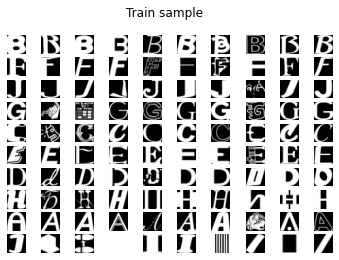

In [58]:
test_sample_folder = '../notMNIST_small'
train_sample_folder = '../notMNIST_large'

train_sample = load_image_paths_from_folder(train_sample_folder)
test_sample = load_image_paths_from_folder(test_sample_folder)

plot_samples(test_sample, 10, 'Test sample')
plot_samples(train_sample, 10, 'Train sample')


In [59]:
# # 2: check if samples are balanced

image_size = 28 # Pixel width and height.
pixel_depth = 255.0 # Number of levels per pixel.

# We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values,
# normalized to have approximately zero mean and standard deviation ~0.5
# to make training easier down the road.

In [60]:
def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    """image_files is an array of all the filenames"""
    image_files = os.listdir(folder)
    """dataset is an array of length being the total number of images, and each image is 28x28"""
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            """this is the normalization step - the formula is [value-(255/2)]/255"""
            image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            """after the normalization, stick the normalized image
               into the dataset array at the nth position"""
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')

    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                        (num_images, min_num_images))

    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset

In [61]:
# Pickle is used for serializing and de-serializing Python object structures,
# also called marshalling or flattening.
def pickle_dataset(data_folders, min_num_images_per_class):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename):
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)

    return dataset_names


In [62]:
train_datasets = pickle_dataset(train_sample['folders'], 45000)
test_datasets = pickle_dataset(test_sample['folders'], 1800)


../notMNIST_large/B.pickle already present - Skipping pickling.
../notMNIST_large/F.pickle already present - Skipping pickling.
../notMNIST_large/J.pickle already present - Skipping pickling.
../notMNIST_large/G.pickle already present - Skipping pickling.
../notMNIST_large/C.pickle already present - Skipping pickling.
../notMNIST_large/E.pickle already present - Skipping pickling.
../notMNIST_large/D.pickle already present - Skipping pickling.
../notMNIST_large/H.pickle already present - Skipping pickling.
../notMNIST_large/A.pickle already present - Skipping pickling.
../notMNIST_large/I.pickle already present - Skipping pickling.
../notMNIST_small/B.pickle already present - Skipping pickling.
../notMNIST_small/F.pickle already present - Skipping pickling.
../notMNIST_small/J.pickle already present - Skipping pickling.
../notMNIST_small/G.pickle already present - Skipping pickling.
../notMNIST_small/C.pickle already present - Skipping pickling.
../notMNIST_small/E.pickle already prese

In [63]:
def num_of_images(datasets):
    num = []

    for pickle_file in datasets:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
            print('Total images in', pickle_file, ':', len(data))
            num.append(len(data))

    return num

In [64]:
def balance_check(sizes):
    mean_val = mean(sizes)
    print('mean of # images :', mean_val)
    for i in sizes:
        if abs(i - mean_val) > 0.1 * mean_val:
            print("Too much or less images")
        else:
            print("Well balanced", i)

In [65]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [66]:
def generate_fake_label(sizes):
    labels = np.ndarray(sum(sizes), dtype=np.int32)
    start = 0
    end = 0
    for label, size in enumerate(sizes):
        start = end
        end += size
        for j in range(start, end):
            labels[j] = label
    return labels

In [67]:
def plot_balance(train_labels, test_labels):
    fig, ax = plt.subplots(1, 2)
    bins = np.arange(train_labels.min(), train_labels.max() + 2)
    ax[0].hist(train_labels, bins=bins)
    ax[0].set_xticks((bins[:-1] + bins[1:]) / 2, [chr(k) for k in range(ord("A"), ord("J") + 1)])
    ax[0].set_title("Training data")

    bins = np.arange(test_labels.min(), test_labels.max() + 2)
    ax[1].hist(test_labels, bins=bins)
    ax[1].set_xticks((bins[:-1] + bins[1:]) / 2, [chr(k) for k in range(ord("A"), ord("J") + 1)])
    ax[1].set_title("Test data")
    plt.show()

Total images in ../notMNIST_small/B.pickle : 1873
Total images in ../notMNIST_small/F.pickle : 1872
Total images in ../notMNIST_small/J.pickle : 1872
Total images in ../notMNIST_small/G.pickle : 1872
Total images in ../notMNIST_small/C.pickle : 1873
Total images in ../notMNIST_small/E.pickle : 1873
Total images in ../notMNIST_small/D.pickle : 1873
Total images in ../notMNIST_small/H.pickle : 1872
Total images in ../notMNIST_small/A.pickle : 1872
Total images in ../notMNIST_small/I.pickle : 1872
Total images in ../notMNIST_large/B.pickle : 52911
Total images in ../notMNIST_large/F.pickle : 52912
Total images in ../notMNIST_large/J.pickle : 52911
Total images in ../notMNIST_large/G.pickle : 52912
Total images in ../notMNIST_large/C.pickle : 52912
Total images in ../notMNIST_large/E.pickle : 52912
Total images in ../notMNIST_large/D.pickle : 52911
Total images in ../notMNIST_large/H.pickle : 52912
Total images in ../notMNIST_large/A.pickle : 52909
Total images in ../notMNIST_large/I.pickl

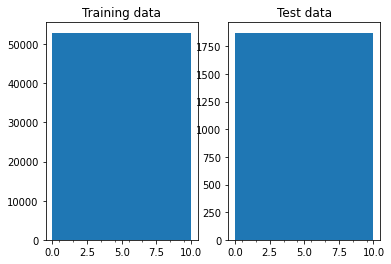

In [68]:
test_labels = generate_fake_label(num_of_images(test_datasets))
train_labels = generate_fake_label(num_of_images(train_datasets))

# Checking balance
balance_check(num_of_images(test_datasets))
balance_check(num_of_images(train_datasets))

plot_balance(train_labels=train_labels, test_labels=test_labels)


In [69]:
# 3: divide into train (200k images), valid (10k images), test (19k images) subsamples

In [70]:
# creates 2 blank arrays for each class - 1 3D array for the data, and 1 array for the labels
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels


In [71]:
# merge samples from each class into 1 dataset
def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes

    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise

    return valid_dataset, valid_labels, train_dataset, train_labels


In [72]:
train_size = 200000
valid_size = 19000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)


Training: (200000, 28, 28) (200000,)
Validation: (19000, 28, 28) (19000,)
Testing: (10000, 28, 28) (10000,)
